In [1]:
# 概述¶


# y^=XW
# where:

# y^ = 预测值 | ∈RNX1 (N 是样本的个数)
# X = 输入 | ∈RNXD (D 是特征的个数)
# W = 权重 | ∈RDX1
# 目标: 通过线性模型的输入 X 去预测 y^。模型将会寻找一条最优的线使得我们的预测值和目标值最为接近。训练数据 (X,y) 用来训练这个模型并且通过随机梯度下降(SGD)学习权重 W。
# 优点:
# 计算简单。
# 解释性强。
# 可用于连续（continuous）和无序的类别（categorical）特征。
# 缺点:
# 线性模型只能用于线性可分的数据(针对于分类任务).
# 但是通常来讲不会用于分类任务，仅仅用于回归问题。
# 其他: 当然你也可以使用线性回归去做二分类任务，如果预测出的连续数值高于一个阈值它就属于一个特定的分类。但是我们在未来的课程中将会介绍可用于做二分类任务更好的模型，所以我们本次课程只会集中在怎么用线性回归去做回归任务。
# 训练
# 步骤:

# 随机初始化模型的权重W。
# 将输入值 X 传入模型并且得到预测值y^。
# 通过损失函数来计算预测值y^和真实值y^之间的差距，从而得到损失值J。普遍在线性回归中用到的损失函数是均方误差(MSE)。这个函数计算出预测值和真实值之间的差距的平方(12 没有数学意义，只是在求导的时候可以正好和平方抵消，方便计算)。
# MSE=J(θ)=12∑i(y^i−yi)2
# 计算出对于模型权重的损失梯度J(θ)
# J(θ)=12∑i(y^i−yi)2=12∑i(XiW−yi)2
# ∂J∂W=X(y^−y)
# 我们使用学习率α和一个优化方法(比如随机梯度下降)，通过反向传播来更新权重W。 一个简单的比方就是梯度可以告诉你在哪个方向上增加数值，然后通过减法来使得损失值J(θ)越来越小。
# W=W−α∂J∂W
# 重复2 - 4步直到模型表现最好（也可以说直到损失收敛）。

In [2]:
from argparse import Namespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# 参数
args = Namespace(
    seed=1234,
    data_file="data/sample_data.csv",
    num_samples=100,
    train_size=0.75,
    test_size=0.25,
    num_epochs=100,
)

# 设置随即种子来保证实验结果的可重复性。
np.random.seed(args.seed)

In [4]:
# 生成数据
def generate_data(num_samples):
    X = np.array(range(num_samples))
    y = 3.65*X + 10
    return X, y

In [5]:
# 生成随机数据
X, y = generate_data(args.num_samples)
data = np.vstack([X, y]).T
df = pd.DataFrame(data, columns=['X', 'y'])
df.head()

,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30
3,3.0,20.95
4,4.0,24.60


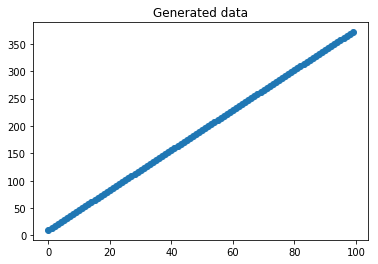

In [6]:
# 画散点图
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [7]:
# 注意: LinearRegression类在Scikit-learn中使用的是正规方程法来做的拟合。然而，我们将会使用Scikit-learn中的随机梯度下降SGDRegressor类来拟合数据。我们使用这个优化方法是因为在未来的几节课程中我们也会使用到它。

In [8]:
# 调包
from sklearn.linear_model.stochastic_gradient import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
# 划分数据到训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    df["X"].values.reshape(-1, 1), df["y"], test_size=args.test_size, 
    random_state=args.seed)
print ("X_train:", X_train.shape)
print ("y_train:", y_train.shape)
print ("X_test:", X_test.shape)
print ("y_test:", y_test.shape)

X_train: (75, 1)
y_train: (75,)
X_test: (25, 1)
y_test: (25,)


In [10]:
# 标准化训练集数据 (mean=0, std=1) 
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train.values.reshape(-1,1))

# 在训练集和测试集上进行标准化操作
standardized_X_train = X_scaler.transform(X_train)
standardized_y_train = y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardized_X_test = X_scaler.transform(X_test)
standardized_y_test = y_scaler.transform(y_test.values.reshape(-1,1)).ravel()


# 检查
print ("mean:", np.mean(standardized_X_train, axis=0), 
       np.mean(standardized_y_train, axis=0)) # mean 应该是 ~0
print ("std:", np.std(standardized_X_train, axis=0), 
       np.std(standardized_y_train, axis=0))   # std 应该是 1

mean: [8.22952817e-17] -1.5617137213060536e-16
std: [1.] 0.9999999999999999


In [11]:
# 初始化模型
lm = SGDRegressor(loss="squared_loss", penalty="none", max_iter=args.num_epochs)

In [12]:
# 训练
lm.fit(X=standardized_X_train, y=standardized_y_train)

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=100, n_iter=None, penalty='none',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [13]:
# 预测 (还未标准化)
pred_train = (lm.predict(standardized_X_train) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
pred_test = (lm.predict(standardized_X_test) * np.sqrt(y_scaler.var_)) + y_scaler.mean_

In [14]:
# 评估
import matplotlib.pyplot as plt

In [15]:
# 训练和测试集上的均方误差 MSE
train_mse = np.mean((y_train - pred_train) ** 2)
test_mse = np.mean((y_test - pred_test) ** 2)
print ("train_MSE: {0:.2f}, test_MSE: {1:.2f}".format(train_mse, test_mse))

train_MSE: 0.00, test_MSE: 0.00


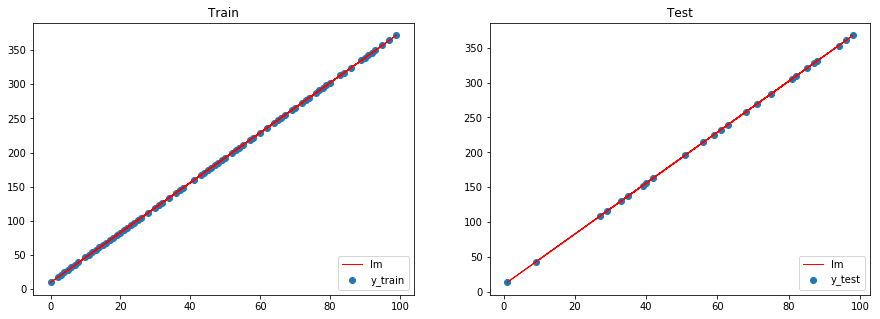

In [16]:
# 图例大小
plt.figure(figsize=(15,5))

# 画出训练数据
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, pred_train, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 画出测试数据
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

# 显示图例
plt.show()

In [17]:
# 传入我们自己的输入值
X_infer = np.array((0, 1, 2), dtype=np.float32)
standardized_X_infer = X_scaler.transform(X_infer.reshape(-1, 1))
pred_infer = (lm.predict(standardized_X_infer) * np.sqrt(y_scaler.var_)) + y_scaler.mean_
print (pred_infer)
df.head(3)

[10.00356575 13.65348546 17.30340518]


,X,y
0,0.0,10.00
1,1.0,13.65
2,2.0,17.30


In [18]:
# 未标准化系数
coef = lm.coef_ * (y_scaler.scale_/X_scaler.scale_)
intercept = lm.intercept_ * y_scaler.scale_ + y_scaler.mean_ - np.sum(coef*X_scaler.mean_)
print (coef) # ~3.65
print (intercept) # ~10

[3.64992275]
[10.00356788]
